In [1]:
from glob import glob
from datetime import datetime
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from tqdm import tqdm
import cftime

import pyart
from netCDF4 import Dataset


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [9]:
radar_id = '2'
date_str = '20211022'
dp_path = f'/scratch/kl02/jss548/dprain/cfradial/{radar_id}/{date_str}'
dp_ffn_list = sorted(glob(dp_path + '/*.nc'))
time_fmt = mdates.DateFormatter('%H:%M')

/g/data/en0/jss548/miniconda3/envs/radar-dev/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
td_ts = []
alpha_ts = []
alpha_method_ts = []
system_phase_ts = []
mean_dp_rr = []
mean_sp_rr = []

for dp_ffn in tqdm(dp_ffn_list, total=len(dp_ffn_list)):
    with Dataset(dp_ffn) as radar:
        print(radar)
        td_ts.append(cftime.num2pydate(radar['time'][0], radar['time'].units))
        alpha_ts.append(radar['specific_attenuation'].alpha)
        alpha_method_ts.append(radar['specific_attenuation'].alpha_method)
        system_phase_ts.append(radar['PHIDP_B'].system_phase)
        mean_dp_rr.append(np.nanmean(radar['ah_rainrate'][:]))
        mean_sp_rr.append(np.nanmean(radar['zr_rainrate'][:]))

/g/data/en0/jss548/miniconda3/envs/radar-dev/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
  0%|          | 0/288 [00:00<?, ?it/s]

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF/Radial instrument_parameters
    version: H5rad 2.2
    title: 
    institution: 
    references: 
    source: RAD:AU02,PLC:Melb,CTY:500,STN:87031
    comment: 
    instrument_name: 
    original_container: odim_h5
    odim_conventions: ODIM_H5/V2_2
    field_names: RHOHV_CORR, ZDR_CORR, radar_echo_classification, hybrid_rainrate, ah_rainrate, kdp_rainrate
    history: 
    dimensions(sizes): time(5040), range(1283), sweep(14), string_length(32)
    variables(dimensions): float32 time(time), float32 range(range), float32 azimuth(time), float64 elevation(time), float32 RHOHV_CORR(time, range), float32 ZDR_CORR(time, range), int16 radar_echo_classification(time, range), float32 hybrid_rainrate(time, range), float32 ah_rainrate(time, range), float32 kdp_rainrate(time, range), int32 sweep_number(sweep), float32 fixed_angle(sweep), int32 sweep_start_ray_index(sweep), int32 sweep_end_ray

IndexError: specific_attenuation not found in /

/g/data/en0/jss548/miniconda3/envs/radar-dev/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


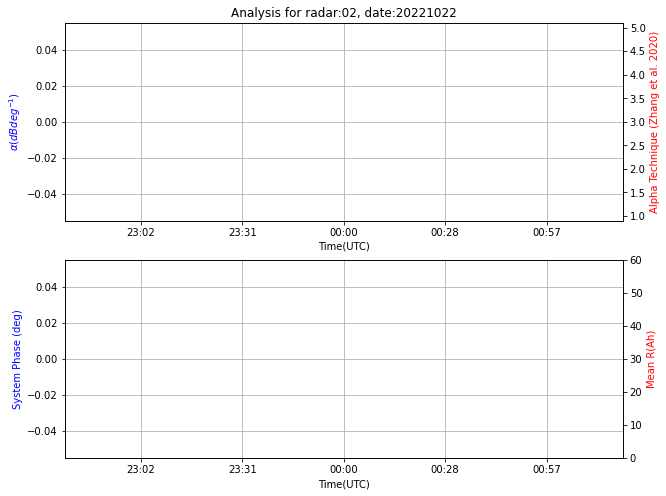

In [4]:
plt.figure(figsize=[10,8])

ax1 = plt.subplot(211)
ax1.set_title(f'Analysis for radar:{radar_id}, date:{date_str}')
ax1.plot(td_ts, alpha_ts, 'b-')
ax1.set_xlabel('Time(UTC)')
ax1.set_ylabel(r"$ \alpha (dB deg^{-1})$", color='b')
ax1.xaxis.set_major_formatter(time_fmt)
ax1.grid()
ax1a = ax1.twinx()
ax1a.plot(td_ts, alpha_method_ts, 'r-')
ax1a.set_ylim(0.9,5.1)
ax1a.set_ylabel("Alpha Technique (Zhang et al. 2020)", color='r')
ax1a.xaxis.set_major_formatter(time_fmt)

ax2 = plt.subplot(212)
ax2.plot(td_ts, system_phase_ts, 'b-')
ax2.set_xlabel('Time(UTC)')
ax2.set_ylabel("System Phase (deg)", color='b')
ax2.xaxis.set_major_formatter(time_fmt)
ax2.grid()
ax2a = ax2.twinx()
ax2a.plot(td_ts, mean_dp_rr, 'r-')
ax2a.set_ylim(0,60)
ax2a.set_ylabel("Mean R(Ah)", color='r')
ax2a.xaxis.set_major_formatter(time_fmt)